# Predicting a students score based on their study hours 


![Study Hours](https://images.unsplash.com/photo-1524678714210-9917a6c619c2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1169&q=80)

*`Author: Lafir`* 

---

## Introduction

This project is part of the `Data Science and Business Analytics` internship (GRIP) program provided by [The Sparks Foundation](https://internship.thesparksfoundation.info/#grip).  

And the dataset is provided by them as part of `Task #1` in the GRIP January-2022 Program. 

In this project, we will train a machine learning model to predict the percentage of marks scored by a student based on their study hours.  

This is a simple linear regression problem since it involves only two variables, i.e. `Hours` and `Scores`. `Hours` column represents number of study hours, and `Scores` column represents percentage of marks scored by the student. 

In this notebook, we will use linear regression class from scikit-learn linear model library for training our model. We will also use libraries like Pandas, Numpy, Matplotlib, and Seaborn to perform exploratory data analysis and gather insights for machine learning. Here is a list of the activities that our project involves: 


1. Download the Dataset
  - Install and import required libraries
  - Download data from Github
  - Load dataset with Pandas
    
    
2. Explore the Dataset
  - Basic info about dataset
  - Exploratory data analysis & visualization
   
   
3. Prepare Dataset for Training
  - Split into training and validation sets
  - Extract inputs and outputs (targets)


4. Model Training

5. Model Validation

6. Model Application

7. Inferences and Conclusion

8. References 

## 1. Download the Dataset

### Install and import required libraries 

In [1]:
#install all required libraries 
!pip install jovian pandas matplotlib seaborn scikit-learn --upgrade --quiet

In [2]:
#import all required libraries
#to save our notebook online
import jovian

#to work with OS and files 
import os

#to perform arithmetic operations and analysis on data
import numpy as np
import pandas as pd

#to visualize data and their relationship 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

#to prevent warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to save new versions of the notebook online
jovian.commit(project="student-score-prediction")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lafirm/student-score-prediction" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/lafirm/student-score-prediction


'https://jovian.ai/lafirm/student-score-prediction'

### Download data from Github 

In [4]:
#assign dataset url to a variable 
dataset_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [5]:
#import urlretrieve function
from urllib.request import urlretrieve

In [6]:
#download and rename the dataset 
urlretrieve (dataset_url, 'student_scores.csv')

('student_scores.csv', <http.client.HTTPMessage at 0x7fe68bd76910>)

In [7]:
#to check whether dataset is downloaded
os.listdir()

['.bash_logout',
 '.profile',
 '.bashrc',
 '.ipynb_checkpoints',
 '.ipython',
 '.local',
 'student_scores.csv',
 '.cache',
 '.jovianrc',
 'student-score-prediction.ipynb',
 '.jupyter',
 '.jovian',
 '.config',
 '.conda',
 '.wget-hsts',
 '.git',
 'work',
 '.npm']

### Load dataset with Pandas

In [8]:
#to convert CSV file into pandas dataframe
raw_df = pd.read_csv('student_scores.csv')

In [9]:
#display top 5 rows of raw_df 
raw_df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


---

## 2. Explore the Dataset 

### Basic info about the Dataset

Let's check some basic information regarding the dataset like size, column names, data types and statistical information like mean, median, max and min value etc. 

In [10]:
#to check the shape of dataset 
raw_df.shape

(25, 2)

This dataset has 25 rows and 2 columns

In [11]:
#to view some basic info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


`Hours` column contains `float64` data type, `Scores` column contains `int64` data type. 

In [12]:
#to view some basic statistical information 
raw_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Number of hours studied by the students ranges from 1.1 to 9.2, with mean and median value of 5.01 and 4.8 respectively. 

The percentage of marks scored by the students ranges from 17 to 95, with mean and median value of 51.48 and 47 respectively. 

In [13]:
#to check the column names
raw_df.columns

Index(['Hours', 'Scores'], dtype='object')

### Exploratory data analysis & visualization

Exploratory Data Analysis (EDA) is a process of analyzing a dataset and synthesizing the key insights and characteristics of the data. It helps us to gain a deeper understanding of the data.

In [14]:
#to avoid displaying graphs as pop-ups 
%matplotlib inline 
#to set some default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

#### Distribution of Study Hours

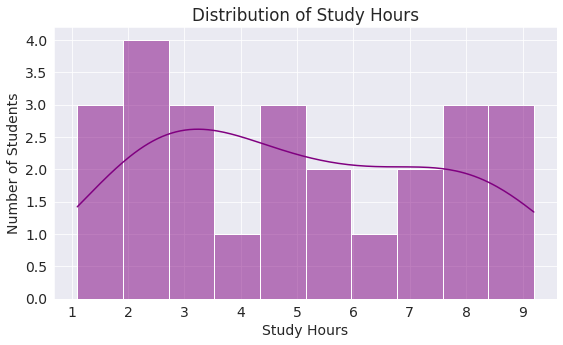

In [15]:
plt.title('Distribution of Study Hours')
sns.histplot(x='Hours', data = raw_df, kde = True, bins = 10, color = 'purple')
plt.xlabel('Study Hours')
plt.ylabel('Number of Students')
plt.show()

#### Distribution of Scores

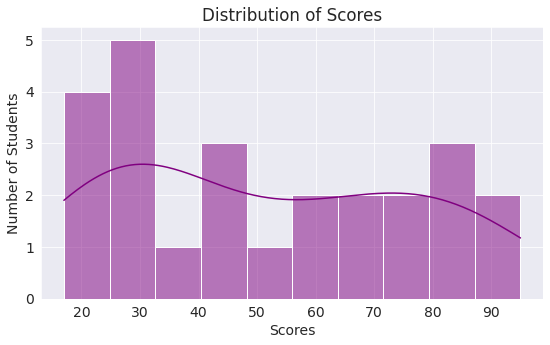

In [16]:
plt.title('Distribution of Scores')
sns.histplot(x='Scores', data = raw_df, kde = True, bins = 10, color = 'purple')
plt.xlabel('Scores')
plt.ylabel('Number of Students')
plt.show()

#### Relationship between Study Hours & Scores 

In [17]:
print('Correlation between the number of hours studied and the percentage scored by a student is {}'.format(round(raw_df.Scores.corr(raw_df.Hours),3)))

Correlation between the number of hours studied and the percentage scored by a student is 0.976


Let's use `lmplot()` function to create a regression plot (linear model plot). It creates a scatter plot with a linear fit on top of it. 

**The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis. It creates a regression line between 2 parameters and helps to visualize their linear relationships.**

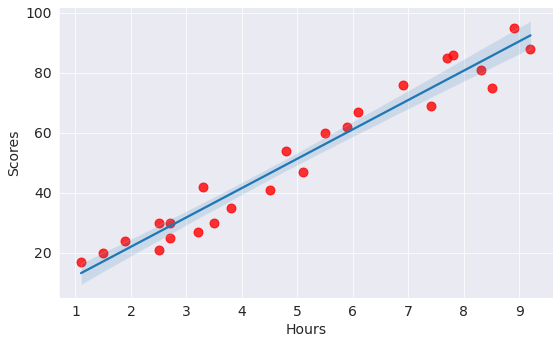

In [18]:
sns.lmplot(x='Hours', y='Scores', data =raw_df, scatter_kws = {'color' : 'red', 's':80}, aspect = 1.6)
plt.show()

It's clear that there is a strong positive correlation between the percentage of marks scored by the students and the number of hours they studied. 

---

## 3. Prepare Dataset for Training

Let's split the dataset into training and validation set using `train_test_split()` function from scikit-learn library. 

### Split into training and validation sets

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
#split raw_df into training and validation dataset 
train_df, val_df = train_test_split(raw_df, test_size = 0.25, random_state = 42 )

In [21]:
print ('train_df.shape : {}'.format(train_df.shape))
print ('val_df.shape : {}'.format(val_df.shape))

train_df.shape : (18, 2)
val_df.shape : (7, 2)


### Extract inputs and outputs (targets)

In [22]:
#separate and assign input and target columns
input_col = 'Hours'
target_col = 'Scores'

In [23]:
#create separate variables to store inputs and target values for training and validation dataset
train_inputs = train_df[[input_col]] #inputs should be always 2D
train_targets = train_df[target_col]
val_inputs = val_df[[input_col]] #inputs should be always 2D 
val_targets = val_df[target_col]

---

## 4. Model Training

Let's train our simple linear regression model with the training data by importing `LinearRegression` class from `linear_model` library in scikit-learn. 

In [24]:
#import LinearRegression class from linear_model in scikit-learn 
from sklearn.linear_model import LinearRegression 

In [25]:
#assign the model class to a variable
model = LinearRegression()

In [26]:
#train our model using train_inputs and train_targets by using fit method
model.fit(train_inputs, train_targets)
print('Training Completed Successfully')

Training Completed Successfully


In [27]:
print ('Slope of the linear model is {:.2f}'.format(model.coef_[0])) 

Slope of the linear model is 9.71


In [28]:
print ('Intercept of the linear model is {:.2f}'.format(model.intercept_)) 

Intercept of the linear model is 2.48


In [29]:
#predict the values of target column with our trained model
train_preds = model.predict(train_inputs)
train_preds 

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

#### Loss Function

We will use the root mean squared error (RMSE) function as the loss function to measure the loss.

The root mean square error is an important metric for determining how well a model fits a dataset. The larger the RMSE, the bigger the difference between the predicted and observed values, which means the worse the model fits. In contrast, the smaller the RMSE, the better a model fits the data. Below is a mathematical expression to describe the RMSE: 

<img src="https://i.stack.imgur.com/CCtDG.jpg" width="420">

Let's define a helper function to compute the RMSE.

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
def rmse(targets, preds):
    ''' rmse() is a helper function used to determine the root mean squared error.
        It accepts only 2 arguments:
        targets : actual output value
        preds   : predicted output value 
    ''' 
    rmse = mean_squared_error(targets, preds, squared = False)
    return rmse

In [32]:
rmse(train_targets, train_preds)

5.580119821565466

#### Visualize predicted and actual values of training dataset

In [33]:
pd.DataFrame({'train_inputs' : train_inputs.Hours,'train_targets' : train_targets, 'train_preds' : train_preds})

,train_inputs,train_targets,train_preds
1,5.1,47,52.022237
22,3.8,35,39.393917
5,1.5,20,17.051505
2,3.2,27,33.565462
12,4.5,41,46.193782
15,8.9,95,88.935788
3,8.5,75,85.050151
4,3.5,30,36.479690
20,2.7,30,28.708416
17,1.9,24,20.937142


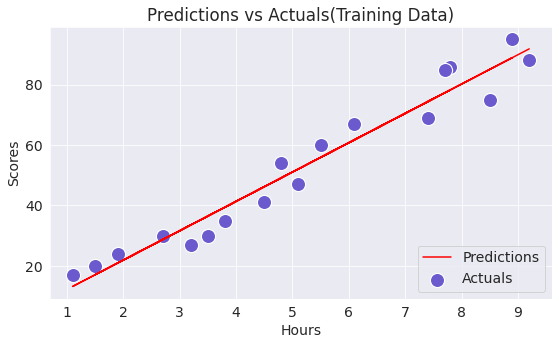

RMSE Loss in training dataset : 5.58


In [34]:
plt.title('Predictions vs Actuals(Training Data)')
plt.plot(train_inputs.Hours, train_preds, color = 'red')
sns.scatterplot(x=train_inputs.Hours, y=train_targets, color = 'slateblue', s = 200)
plt.legend(['Predictions', 'Actuals'], loc = 4)
plt.show()
print(f'RMSE Loss in training dataset : {rmse(train_targets, train_preds):.2f}') 

---

## 5. Model Validation

Let's evaluate our trained model with the help of validation set. 

In [35]:
val_preds = model.predict(val_inputs)

In [36]:
rmse(val_targets, val_preds)

4.849370684387328

#### Visualize predicted and actual values of validation dataset

In [37]:
pd.DataFrame({'val_inputs' : val_inputs.Hours, 'val_targets' : val_targets, 'val_preds' : val_preds})

,val_inputs,val_targets,val_preds
8,8.3,81,83.107332
16,2.5,30,26.765598
0,2.5,21,26.765598
23,6.9,76,69.507603
11,5.9,62,59.793511
9,2.7,25,28.708416
13,3.3,42,34.536871


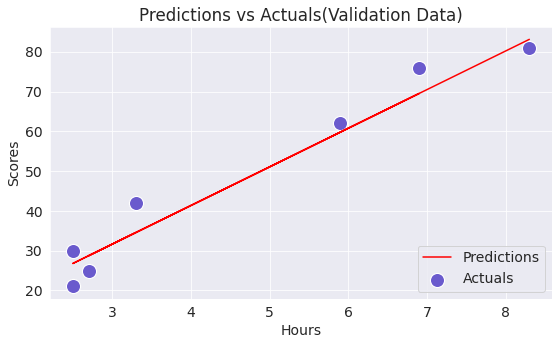

RMSE Loss in validation dataset : 4.85


In [38]:
plt.title('Predictions vs Actuals(Validation Data)')
plt.plot(val_inputs.Hours, val_preds, color = 'red')
sns.scatterplot(x=val_inputs.Hours, y=val_targets, color = 'slateblue', s = 200)
plt.legend(['Predictions', 'Actuals'], loc = 4)
plt.show()
print(f'RMSE Loss in validation dataset : {rmse (val_targets, val_preds):.2f}') 

---

## 6. Model Application

**Predict the score of a student when he/she studies for 9.5 hrs/day.**

We now apply our model to predict the score based on study hours, so in this case, we take 9.5 hours. This means, if a student studies for nine and a half hours, approximately what marks will be scored by the student based on the data we received and the model we applied.

In [39]:
test_input = [[9.5]] 

In [40]:
model.predict(test_input)

array([94.76424292])

In [41]:
print('The score of a student when he/she studies for 9.5 hrs/day is {:.2f}'.format(model.predict(test_input)[0]))

The score of a student when he/she studies for 9.5 hrs/day is 94.76


**Now that we have successfully implemented the model and received the outputs, the important thing to remember is that this model only works for the dataset provided here, the results may change if the dataset is changed, in which case we need to optimize the model again.**

---

## 7. Inferences and Conclusion

- This dataset has 25 rows and 2 columns.

- Each row represents number of hours a student studies and the percentage of marks scored by the corresponding student.

- Number of hours studied by the students ranges from 1.1 to 9.2, with mean and median value of 5.01 and 4.8 respectively.

- The percentage of marks scored by the students ranges from 17 to 95, with mean and median value of 51.48 and 47 respectively.

- There is a strong positive correlation between the percentage of marks scored by the students and the number of hours they studied i.e 0.976

- We used a simple linear regression class from linear model library in scikit-learn to predict the percentage of marks scored by a student. 

**Problem Statement:**

**Predict the score of a student when he/she studies for 9.5 hrs/day.**

- The student score when he/she studies for 9.5 hrs/day is 94.76

**Conclusion:**

The amount of data plays a crucial role in creating successful and accurate Machine Learning models. With a small dataset, we cannot build a successful model that accurately predicts real-world events. 

Since the dataset is very small, it is very important to remember that this model only works with this dataset. If the dataset changes, the results will change, so we will need to optimize it again.

---

## 8. References

Check out the following resources to learn more about the dataset and tools used in this notebook:

**Dataset**

- Student Score Dataset [Download Link](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv ) 
- The Sparks Foundation - GRIP Program [Website](https://internship.thesparksfoundation.info/#grip) 


**Tutorials** 

- Linear Regression with Scikit-Learn [Jovian](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn)
- Machine Learning with Python [Jovian](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms)


**Documentation**  

- Scikit-Learn Supervised Learning [Documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)  
- Seaborn Regression Plot [Documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) 

**Blogs**

- Breaking the curse of small datasets in Machine Learning [Part-1](https://towardsdatascience.com/breaking-the-curse-of-small-datasets-in-machine-learning-part-1-36f28b0c044d)

- Data Visualization in Python by [Siddhardhan](https://medium.com/@siddhardhan23/data-visualization-in-python-a90ddb706b23) 

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>